# Initial Data Exploration
## Recreating Avg TSA
#### Author: Sofia Ingersoll
##### Date: 2024-01-15

##### Packages

In [2]:
# loading packages
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

##### Data

In [20]:
# load the data that's stored in casper
file = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
ds = xr.open_dataset(file)

##### Exploration

400 grid cells, 10 year simulation, the file is 2D contains grid cell and time, average overtime and map


We want avg TSA

In [10]:
ds

<xarray.Dataset>
Dimensions:                            (levgrnd: 25, levsoi: 20, levlak: 10,
                                        levdcmp: 25, time: 120,
                                        hist_interval: 2, lon: 144, lat: 96,
                                        gridcell: 400, landunit: 1148,
                                        column: 2599, pft: 4387, cft: 2,
                                        ltype: 9, nvegwcs: 4)
Coordinates:
  * levgrnd                            (levgrnd) float32 0.01 0.04 ... 42.0
  * levsoi                             (levsoi) float32 0.01 0.04 ... 6.94 8.03
  * levlak                             (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                            (levdcmp) float32 0.01 0.04 ... 42.0
  * time                               (time) object 2005-02-01 00:00:00 ... ...
  * lon                                (lon) float32 0.0 2.5 5.0 ... 355.0 357.5
  * lat                                (lat) float32 -90.0 -88.11 ... 88.11 90.0
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft,
                                cft, ltype, nvegwcs
Data variables: (12/497)
    mcdate                             (time) int32 ...
    mcsec                              (time) int32 ...
    mdcur                              (time) int32 ...
    mscur                              (time) int32 ...
    nstep                              (time) int32 ...
    time_bounds                        (time, hist_interval) object ...
    ...                                 ...
    XSMRPOOL                           (time, gridcell) float32 ...
    XSMRPOOL_RECOVER                   (time, gridcell) float32 ...
    ZBOT                               (time, gridcell) float32 ...
    ZWT                                (time, gridcell) float32 ...
    ZWT_CH4_UNSAT                      (time, gridcell) float32 ...
    ZWT_PERCH                          (time, gridcell) float32 ...
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 09/06/23 02:33:14
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./PPEn11_CTL2010_OAAT0000.clm2...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

##### Avg TSA 

Want to take the mean of variable `TSA` so we can use this as a variable to color map with later.

In [11]:
tsa = ds['TSA']

tsa

<xarray.DataArray 'TSA' (time: 120, gridcell: 400)>
[48000 values with dtype=float32]
Coordinates:
  * time     (time) object 2005-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: gridcell
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [12]:
tsa_avg = tsa.mean(dim = 'time')

##### Visualization

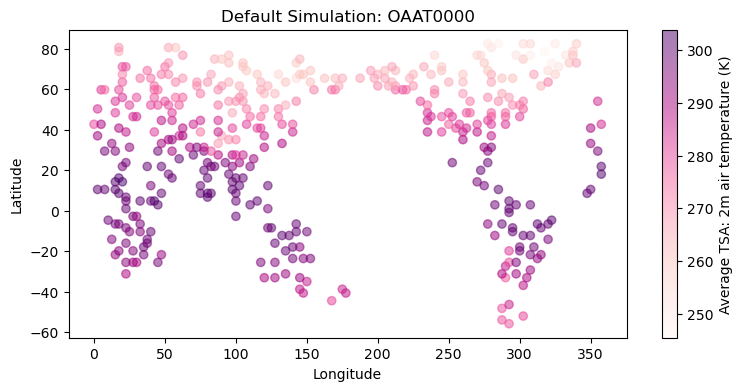

In [13]:
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = tsa_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')

### Function to Automate Global Avg Weighted Landarea by Gridcell

We need an empty list to print output into or a means to store output, I think

In [2]:
filepath_example = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
# function to read in data using filepath
def weight_landarea_gridcells(filepath):

#-------Variable Data-----------------
# variable data described by filepath stored as ds
    ds = xr.open_dataset(filepath)
#-------Gridcell Landareas Data-----
# reading, storing, subsetting
    file2 = '/glade/campaign/cgd/tss/projects/PPE/helpers/sparsegrid_landarea.nc'
    ds2 = xr.open_dataset(file2)
    landarea = ds2['landarea']
    
#------Weight Gridcells by Landarea---
    for gridcell in ds:
        ds.weighted(landarea)

In [3]:
filepath_example = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
ds = xr.open_dataset(filepath_example)

In [10]:
ds.TSA.dims

('time', 'gridcell')

In [11]:
file2 = '/glade/campaign/cgd/tss/projects/PPE/helpers/sparsegrid_landarea.nc'
ds2 = xr.open_dataset(file2)
landarea = ds2['landarea']
weighted_avg_area = ds.TSA.weighted(landarea).mean(dim = 'gridcell')
weighted_avg_area

<xarray.DataArray 'TSA' (time: 120)>
array([279.13522729, 279.83890245, 283.54835407, 287.55817442,
       290.87276366, 293.24786124, 294.19483278, 293.45801477,
       291.77527744, 288.28938363, 283.74954065, 280.11519891,
       278.31839777, 280.23906482, 283.30410677, 286.94442867,
       290.38120771, 293.13017602, 294.08733575, 293.51712022,
       291.52061172, 288.2042198 , 283.16067498, 280.601173  ,
       279.99635209, 280.32522872, 283.41555134, 287.71682648,
       290.73893482, 292.70378337, 293.99232631, 293.71023492,
       291.61800204, 288.06126085, 283.29573516, 279.79630537,
       278.22836951, 279.58458504, 283.97829794, 287.09264699,
       290.41382314, 292.79208376, 294.05428546, 293.46902976,
       291.2803967 , 288.20612216, 283.46345028, 279.77874934,
       278.96503224, 280.11570141, 283.15739974, 287.40704132,
       290.3874279 , 292.83141022, 293.89324054, 293.73541333,
       291.81709816, 288.03646217, 283.2745016 , 279.68249958,
       278.73275887, 280.39694658, 283.66812264, 287.62183069,
       290.99295759, 293.20748655, 294.45039144, 293.77821303,
       291.51579783, 288.03419692, 284.02119503, 279.5854227 ,
       278.59314757, 279.51182872, 282.92012283, 287.21017413,
       290.48158882, 293.0831642 , 294.25169691, 293.6789629 ,
       291.61470401, 288.20071994, 283.03836021, 280.1234707 ,
       278.23853014, 279.56811531, 282.87061355, 287.76772135,
       291.05956393, 293.27725876, 294.2565335 , 293.64250433,
       291.70200231, 288.17758253, 283.62441322, 279.29505021,
       278.79246809, 280.12211891, 283.0107463 , 286.87885651,
       290.7990445 , 293.13032978, 294.08605799, 293.49356481,
       291.505655  , 287.99675484, 283.84853166, 279.99637771,
       278.91499853, 279.43447807, 283.49570327, 287.61285238,
       290.8128853 , 293.19622162, 294.03771727, 293.72742055,
       291.57106709, 288.05586492, 283.15399448, 280.26512635])
Coordinates:
  * time     (time) object 2005-02-01 00:00:00 ... 2015-01-01 00:00:00

In [12]:
(1/landarea.sum())*(landarea*ds.TSA).sum(dim = 'gridcell')

<xarray.DataArray (time: 120)>
array([279.13522729, 279.83890245, 283.54835407, 287.55817442,
       290.87276366, 293.24786124, 294.19483278, 293.45801477,
       291.77527744, 288.28938363, 283.74954065, 280.11519891,
       278.31839777, 280.23906482, 283.30410677, 286.94442867,
       290.38120771, 293.13017602, 294.08733575, 293.51712022,
       291.52061172, 288.2042198 , 283.16067498, 280.601173  ,
       279.99635209, 280.32522872, 283.41555134, 287.71682648,
       290.73893482, 292.70378337, 293.99232631, 293.71023492,
       291.61800204, 288.06126085, 283.29573516, 279.79630537,
       278.22836951, 279.58458504, 283.97829794, 287.09264699,
       290.41382314, 292.79208376, 294.05428546, 293.46902976,
       291.2803967 , 288.20612216, 283.46345028, 279.77874934,
       278.96503224, 280.11570141, 283.15739974, 287.40704132,
       290.3874279 , 292.83141022, 293.89324054, 293.73541333,
       291.81709816, 288.03646217, 283.2745016 , 279.68249958,
       278.73275887, 280.39694658, 283.66812264, 287.62183069,
       290.99295759, 293.20748655, 294.45039144, 293.77821303,
       291.51579783, 288.03419692, 284.02119503, 279.5854227 ,
       278.59314757, 279.51182872, 282.92012283, 287.21017413,
       290.48158882, 293.0831642 , 294.25169691, 293.6789629 ,
       291.61470401, 288.20071994, 283.03836021, 280.1234707 ,
       278.23853014, 279.56811531, 282.87061355, 287.76772135,
       291.05956393, 293.27725876, 294.2565335 , 293.64250433,
       291.70200231, 288.17758253, 283.62441322, 279.29505021,
       278.79246809, 280.12211891, 283.0107463 , 286.87885651,
       290.7990445 , 293.13032978, 294.08605799, 293.49356481,
       291.505655  , 287.99675484, 283.84853166, 279.99637771,
       278.91499853, 279.43447807, 283.49570327, 287.61285238,
       290.8128853 , 293.19622162, 294.03771727, 293.72742055,
       291.57106709, 288.05586492, 283.15399448, 280.26512635])
Coordinates:
  * time     (time) object 2005-02-01 00:00:00 ... 2015-01-01 00:00:00

In [3]:
# dummy variable filepath for TSA,
filepath_example = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'

# testing our function works!
ds = weight_landarea_gridcells(filepath_example)
ds

In [24]:
# subsetting dummy variable
tsa = ds['TSA']

# calculate global mean over time
tsa_avg = tsa.mean(dim = 'time')

# plot mean tsa overtime of weighted gridcells
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = tsa_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')

TypeError: 'NoneType' object is not subscriptable

In [38]:
ds.info()

xarray.Dataset {
dimensions:
	levgrnd = 25 ;
	levsoi = 20 ;
	levlak = 10 ;
	levdcmp = 25 ;
	time = 120 ;
	hist_interval = 2 ;
	lon = 144 ;
	lat = 96 ;
	gridcell = 400 ;
	landunit = 1148 ;
	column = 2599 ;
	pft = 4387 ;
	cft = 2 ;
	ltype = 9 ;
	nvegwcs = 4 ;

variables:
	float32 levgrnd(levgrnd) ;
		levgrnd:long_name = coordinate ground levels ;
		levgrnd:units = m ;
	float32 levsoi(levsoi) ;
		levsoi:long_name = coordinate soil levels (equivalent to top nlevsoi levels of levgrnd) ;
		levsoi:units = m ;
	float32 levlak(levlak) ;
		levlak:long_name = coordinate lake levels ;
		levlak:units = m ;
	float32 levdcmp(levdcmp) ;
		levdcmp:long_name = coordinate levels for soil decomposition variables ;
		levdcmp:units = m ;
	object time(time) ;
		time:long_name = time ;
		time:bounds = time_bounds ;
	int32 mcdate(time) ;
		mcdate:long_name = current date (YYYYMMDD) ;
	int32 mcsec(time) ;
		mcsec:long_name = current seconds of current date ;
		mcsec:units = s ;
	int32 mdcur(time) ;
		mdcur:long

#### Building up function to include variable(s) selection

In [ ]:
# function to read in data using filepath & variable of interest
def ds_processing(filepath, variable_choosen,):

#-------Variable Data-----------------
# variable data described by filepath stored as ds
# reading, storing, subsetting
    file = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
    ds = xr.open_dataset(file)
    variable = ds[variable_chosen]


#-------Gridcell Landareas Data-----
# reading, storing, subsetting
    file2 = '/glade/campaign/cgd/tss/projects/PPE/helpers/sparsegrid_landarea.nc'
    ds2 = xr.open_dataset(file2)
    landarea = ds2['landarea']


#------Weight Gridcells by Landarea---
    for gridcell in variable:
        variable.weighted(landarea)


#-----Calculating Variable Avg--------
variable_avg = variable.mean(dim = 'time')

#ds_processing(filepath_example, 'TSA')


#-----Generating Plot------------------
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = variable_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')        # need to correct w/ f string. also want to implement f string for variable name in a few different places in this function